# 00 - Tổng Quan Dữ Liệu Ban Đầu

## Mục tiêu:
- Nạp dữ liệu gốc và xem tổng quan.
- Thống kê nhanh các cột dạng số và phân loại.
- Phát hiện sơ bộ dữ liệu nhiễu, sai lệch hoặc thiếu.
- Định hướng cho bước làm sạch ở `01_data_cleaning.ipynb`.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Đọc dữ liệu gốc
df = pd.read_csv("../data/raw/Student Depression Dataset.csv")
sns.set_theme(style="whitegrid", palette="viridis")
# Xem kích thước
print("Kích thước dữ liệu:", df.shape)

# Hiển thị 5 dòng đầu
df.head()


Kích thước dữ liệu: (27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


## Thông tin tổng quan
- Kiểm tra kiểu dữ liệu các cột
- Phân tích tỷ lệ thiếu

In [9]:
# Kiểu dữ liệu và thông tin tổng quan
df.info()

# Tỷ lệ thiếu theo cột
missing_ratio = df.isnull().mean().sort_values(ascending=False)
missing_ratio[missing_ratio > 0]  # Chỉ hiển thị cột có thiếu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Financial Stress    0.000108
dtype: float64

## Thống kê mô tả
- Dành cho các cột dạng số
- Giúp xác định ngoại lệ sơ bộ (min/max bất thường)

In [10]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


## Phân tích các cột phân loại
- Hiển thị top các giá trị phổ biến cho từng cột dạng `object`
- Tìm bất thường trong các giá trị như city, degree, gender...

In [11]:
cat_cols = df.columns

for col in cat_cols:
    print(f"\n🔸 {col} (unique: {df[col].nunique()}):")
    print(df[col].value_counts(dropna=False).head(10))



🔸 id (unique: 27901):
id
2        1
94192    1
94236    1
94235    1
94234    1
94231    1
94230    1
94227    1
94223    1
94219    1
Name: count, dtype: int64

🔸 Gender (unique: 2):
Gender
Male      15547
Female    12354
Name: count, dtype: int64

🔸 Age (unique: 34):
Age
24.0    2258
20.0    2237
28.0    2133
29.0    1950
33.0    1893
25.0    1784
21.0    1726
23.0    1645
18.0    1587
19.0    1560
Name: count, dtype: int64

🔸 City (unique: 52):
City
Kalyan         1570
Srinagar       1372
Hyderabad      1340
Vasai-Virar    1290
Lucknow        1155
Thane          1139
Ludhiana       1111
Agra           1094
Surat          1078
Kolkata        1066
Name: count, dtype: int64

🔸 Profession (unique: 14):
Profession
Student             27870
Architect               8
Teacher                 6
Digital Marketer        3
Content Writer          2
Chef                    2
Doctor                  2
Pharmacist              2
Civil Engineer          1
UX/UI Designer          1
Name: count, dtyp

# Trực quan hóa Biến số liên tục bằng Biểu đồ Histogram

--- BẮT ĐẦU VẼ HISTOGRAM CHO CÁC BIẾN SỐ LIÊN TỤC ---


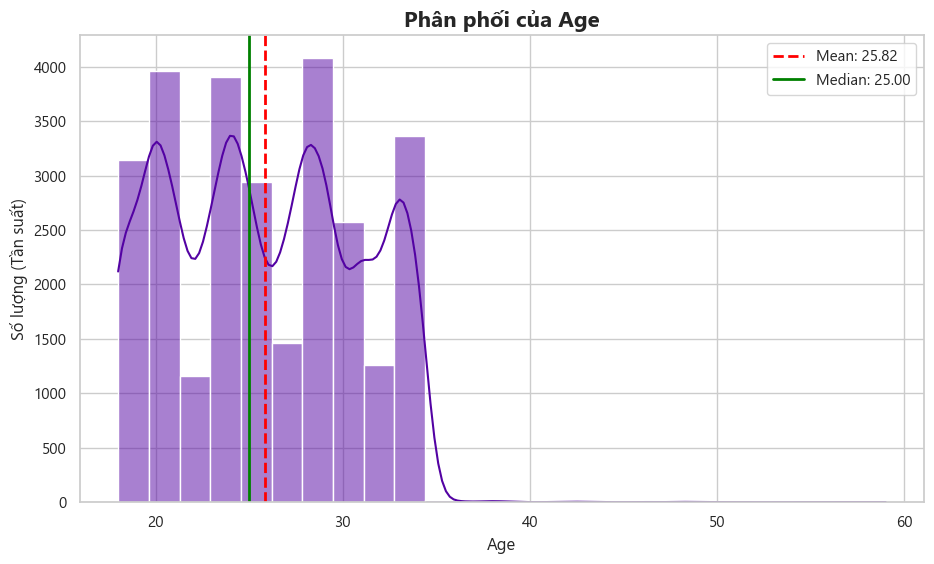

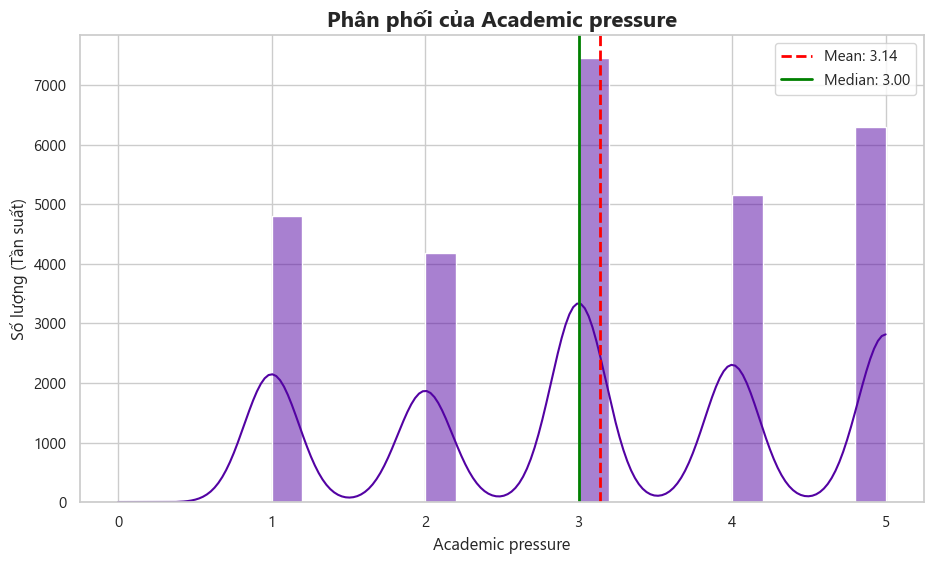

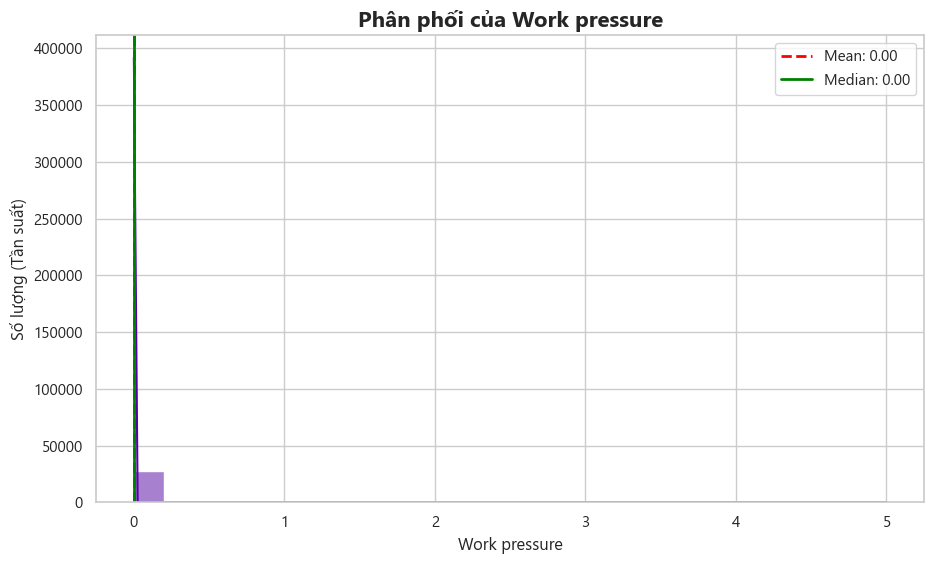

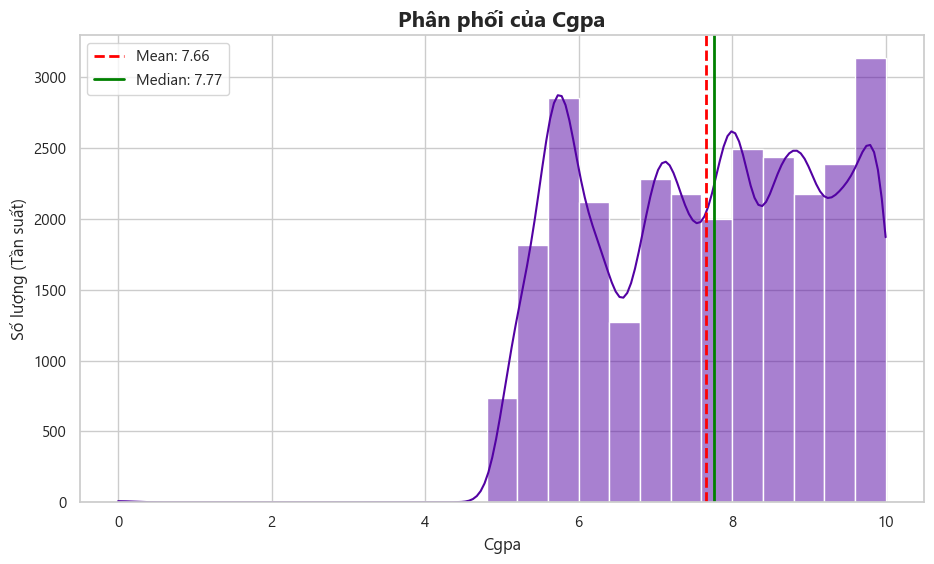

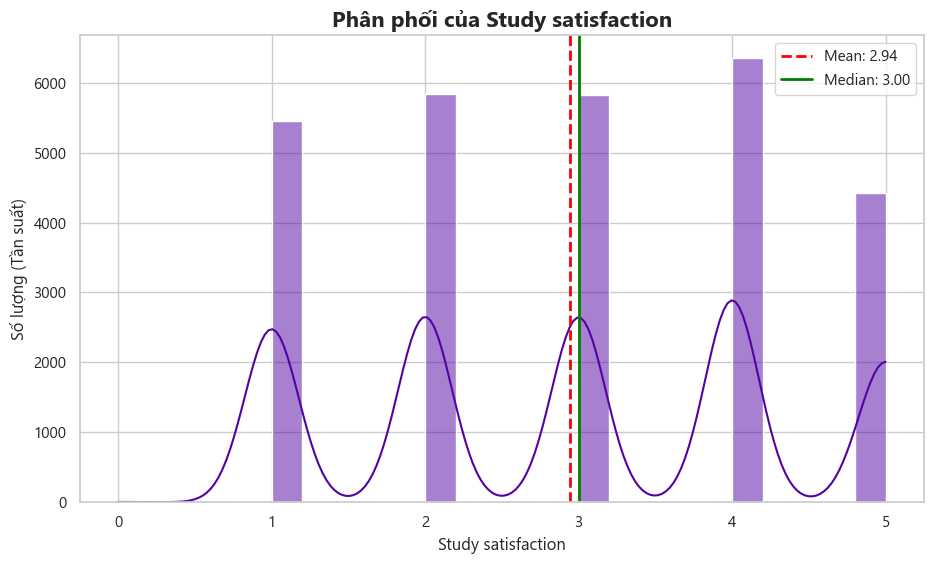

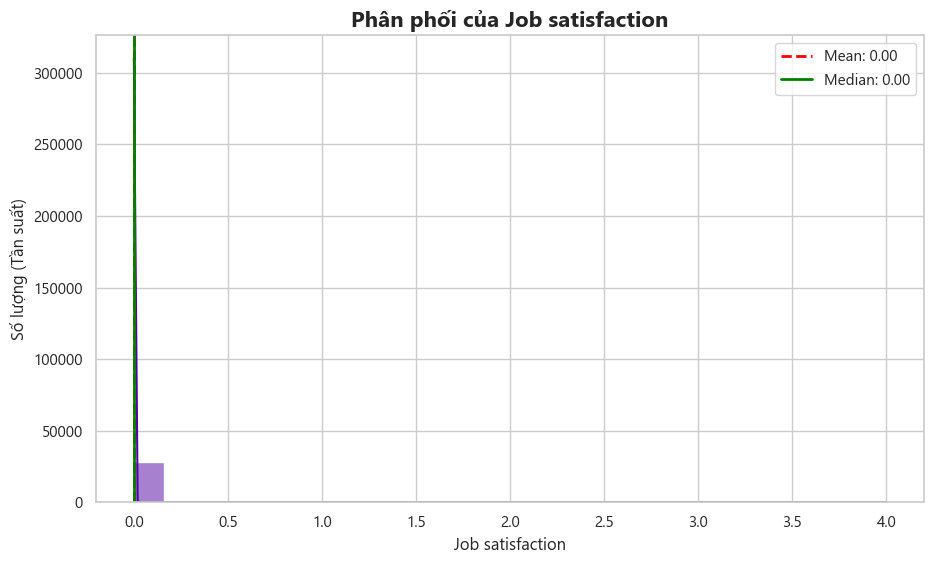

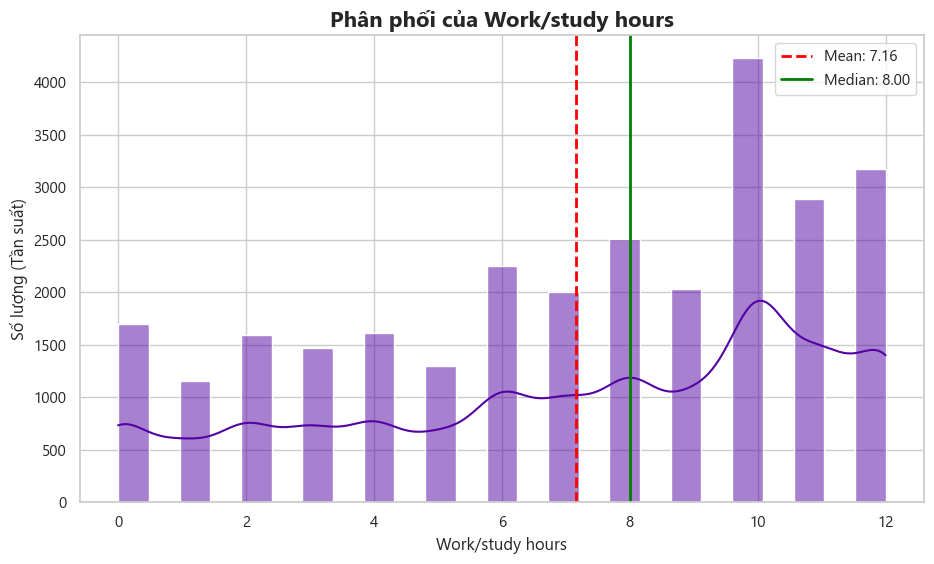

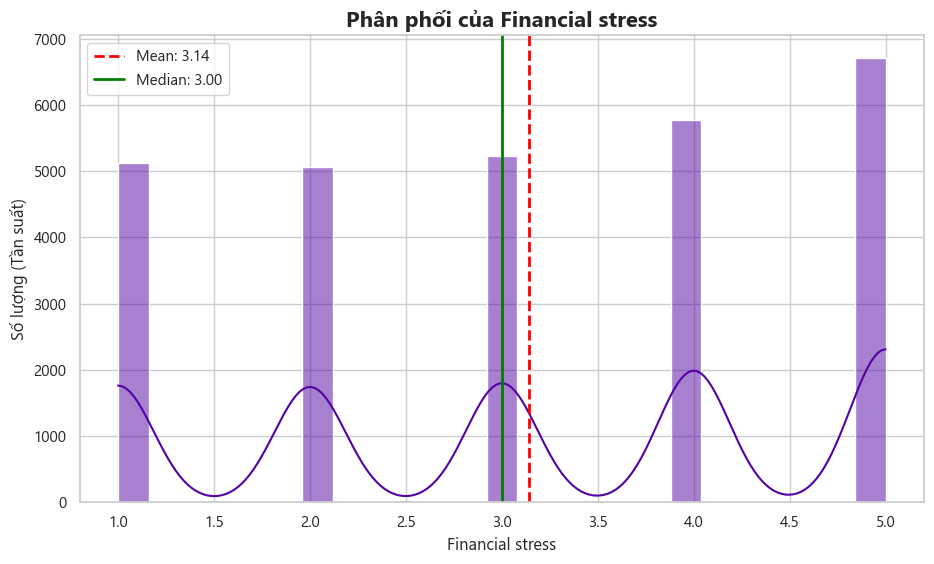

--- HOÀN THÀNH ---


In [12]:

# Giả sử bạn đã đọc dữ liệu vào DataFrame df
# df = pd.read_csv(...)

# Thiết lập style chung cho các biểu đồ
sns.set_theme(style="whitegrid", palette="plasma") # Đổi sang một palette màu khác
plt.rcParams['font.family'] = 'Segoe UI'

# --- Bắt đầu phần code vẽ biểu đồ ---

# 1. Liệt kê ĐẦY ĐỦ các cột số bạn muốn phân tích
# (Bao gồm cả các cột thang điểm 1-5)
numeric_cols = [
    'Age',
    'Academic Pressure',
    'Work Pressure',
    'CGPA',
    'Study Satisfaction',
    'Job Satisfaction',
    'Work/Study Hours',
    'Financial Stress',
    
]

print("--- BẮT ĐẦU VẼ HISTOGRAM CHO CÁC BIẾN SỐ LIÊN TỤC ---")

# 2. Dùng một vòng lặp duy nhất để vẽ cho tất cả các cột
for col in numeric_cols:
    plt.figure(figsize=(9.5, 5.8))
    
    # Vẽ histogram với đường cong mật độ (KDE)
    sns.histplot(data=df, x=col, kde=True, bins=25)
    
    # --- CẢI TIẾN: Thêm đường Mean và Median vào biểu đồ ---
    # Tính toán giá trị trung bình và trung vị
    mean_value = df[col].mean()
    median_value = df[col].median()
    
    # Vẽ các đường thẳng đứng để đánh dấu
    plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='green', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
    
    # Hiển thị chú thích cho các đường vừa vẽ
    plt.legend()
    
    # Đặt tiêu đề và nhãn cho các trục
    plt.title(f'Phân phối của {col.replace("_", " ").capitalize()}', fontsize=16, weight='bold')
    plt.xlabel(col.replace("_", " ").capitalize(), fontsize=12)
    plt.ylabel('Số lượng (Tần suất)', fontsize=12)
    
    plt.tight_layout()
    plt.show()

print("--- HOÀN THÀNH ---")

# Trực quan hóa Biến phân loại bằng Biểu đồ cột (Bar Chart)

--- BẮT ĐẦU VẼ BIỂU ĐỒ CHO CÁC BIẾN PHÂN LOẠI ---
Đang vẽ biểu đồ đứng cho cột 'Gender'...


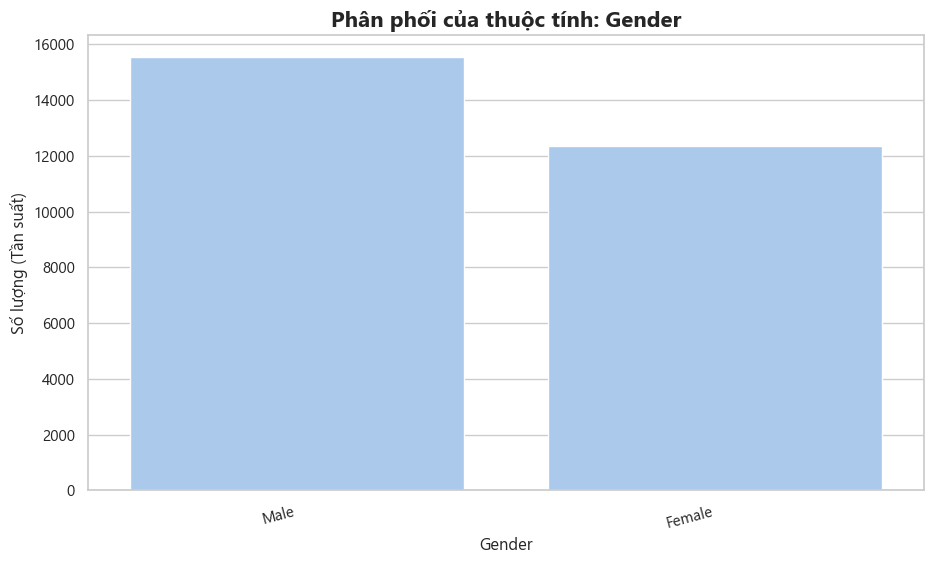

Đang vẽ biểu đồ ngang cho cột 'City' (hiển thị top 15)...


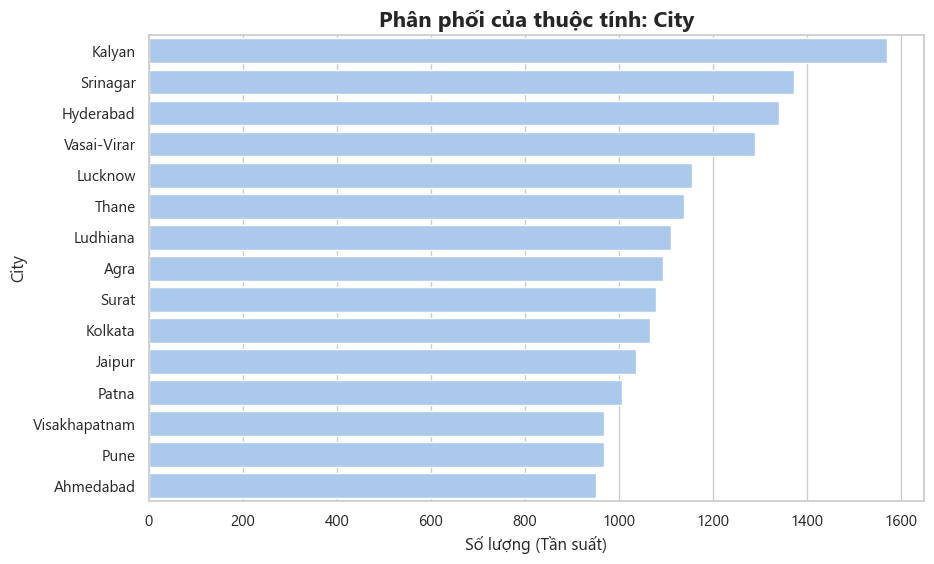

Đang vẽ biểu đồ ngang cho cột 'Profession' (hiển thị top 15)...


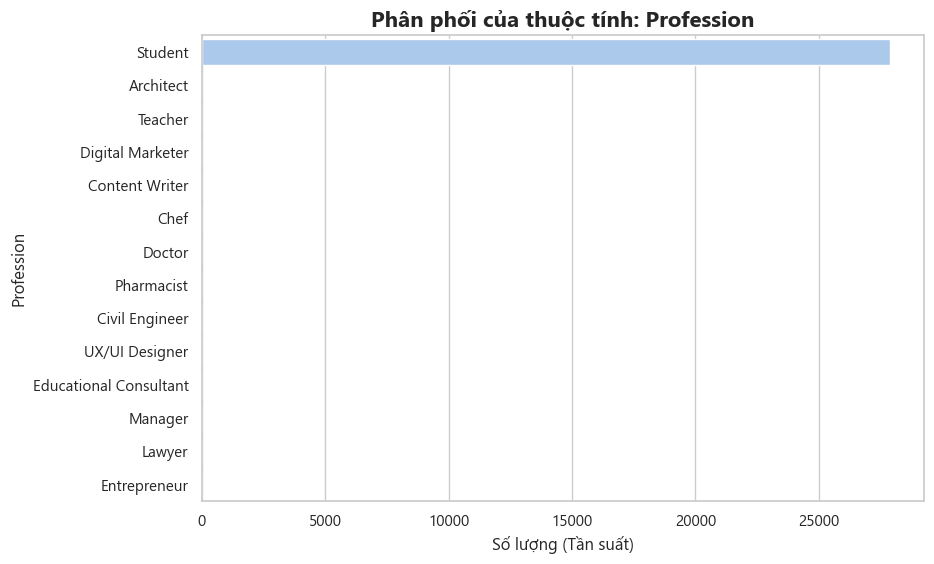

Đang vẽ biểu đồ đứng cho cột 'Sleep Duration'...


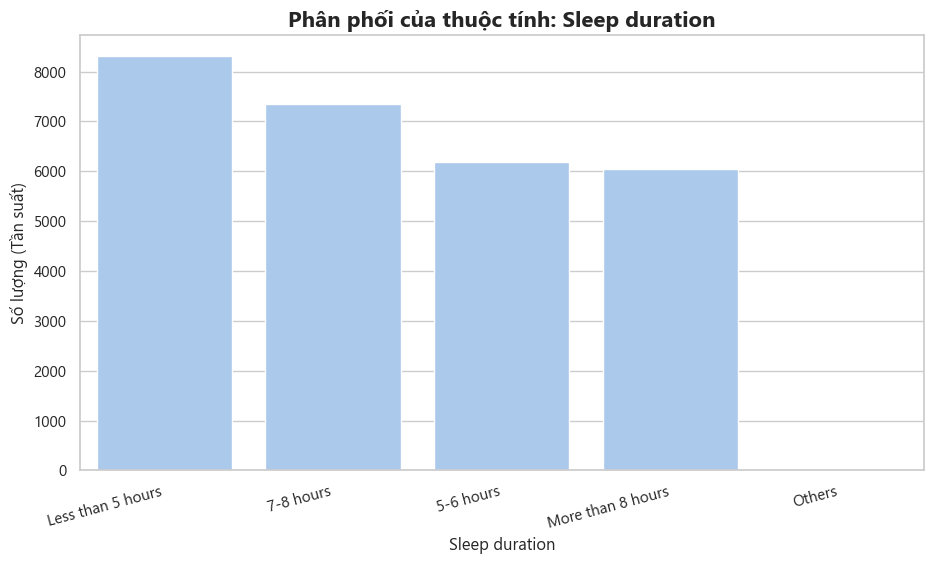

Đang vẽ biểu đồ đứng cho cột 'Dietary Habits'...


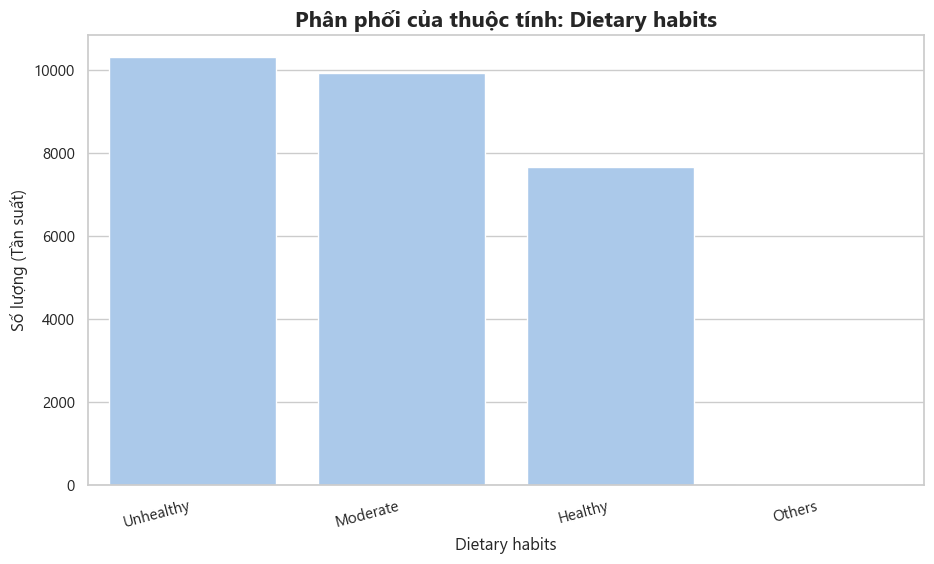

Đang vẽ biểu đồ ngang cho cột 'Degree' (hiển thị top 15)...


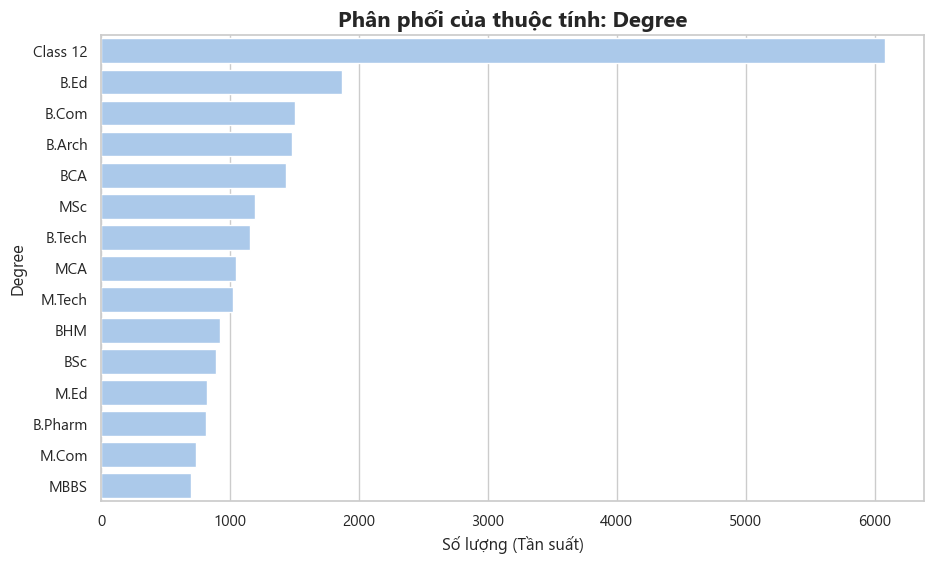

Đang vẽ biểu đồ đứng cho cột 'Have you ever had suicidal thoughts ?'...


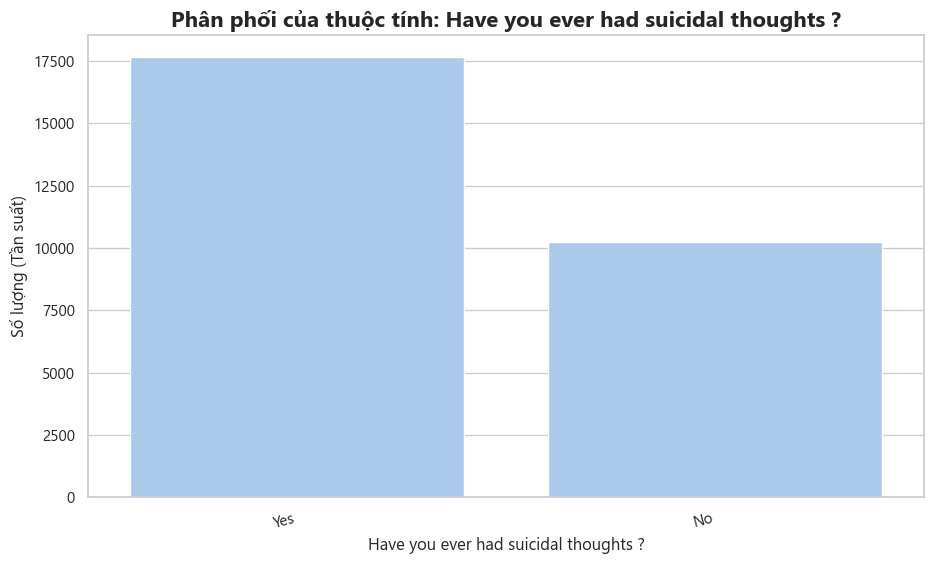

Đang vẽ biểu đồ đứng cho cột 'Family History of Mental Illness'...


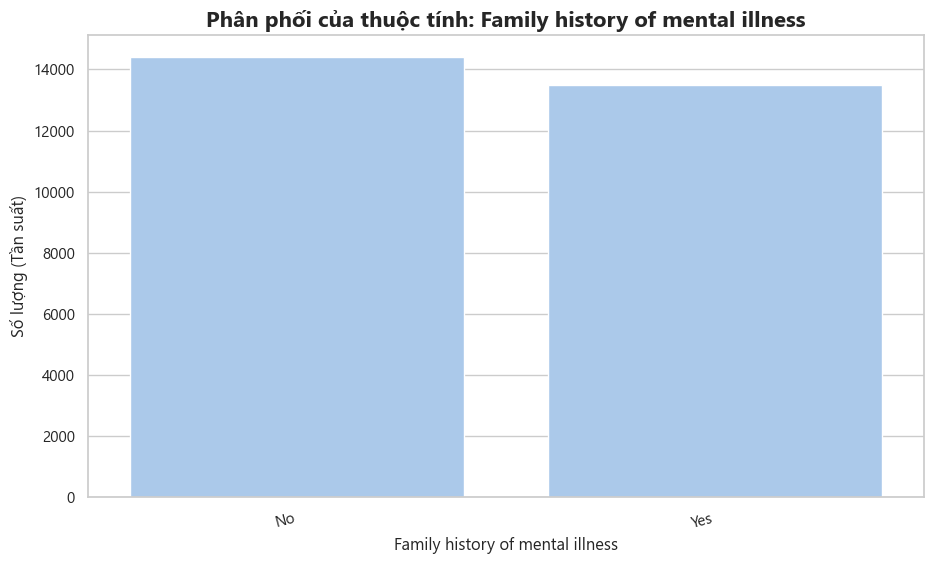

Đang vẽ biểu đồ đứng cho cột 'Depression'...


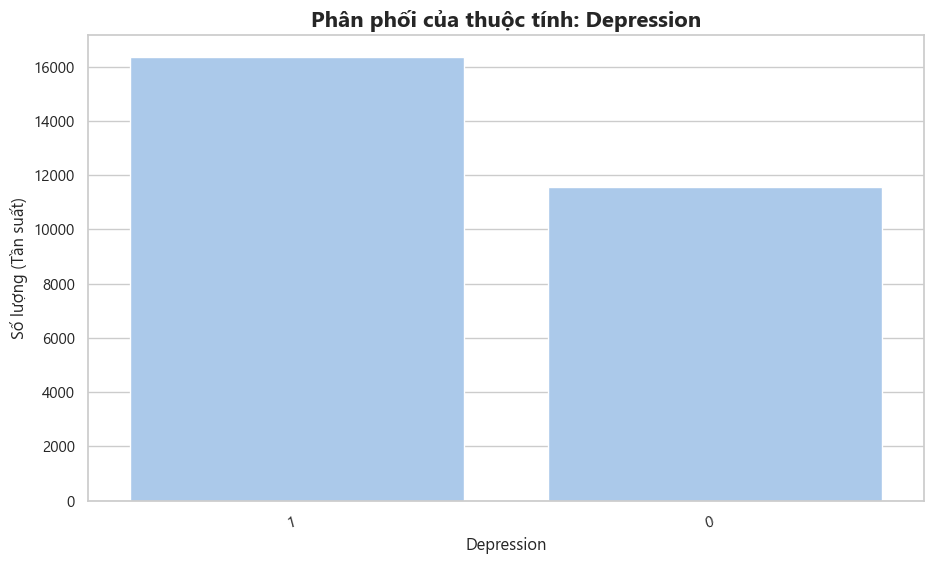

--- HOÀN THÀNH ---


In [13]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['font.family'] = 'Segoe UI' # Dùng font Segoe UI cho Tiếng Việt

# --- Bắt đầu phần code vẽ biểu đồ ---

# 1. Liệt kê tất cả các cột phân loại bạn muốn phân tích
categorical_cols = [
    'Gender', 
    'City',
    'Profession',
    'Sleep Duration', 
    'Dietary Habits', 
    'Degree', 
    'Have you ever had suicidal thoughts ?',
    'Family History of Mental Illness',
    'Depression'
    
]

print("--- BẮT ĐẦU VẼ BIỂU ĐỒ CHO CÁC BIẾN PHÂN LOẠI ---")

# 2. Dùng vòng lặp để vẽ biểu đồ cho từng cột
for col in categorical_cols:
    plt.figure(figsize=(9.5, 5.8)) # Tạo một khung hình mới cho mỗi biểu đồ

    # --- Logic thông minh để xử lý các cột có nhiều hạng mục ---
    # Nếu một cột có hơn 10 giá trị duy nhất (ví dụ: city, degree),
    # chúng ta sẽ vẽ biểu đồ ngang và chỉ hiển thị 15 hạng mục phổ biến nhất.
    if df[col].nunique() > 10:
        print(f"Đang vẽ biểu đồ ngang cho cột '{col}' (hiển thị top 15)...")
        
        # Lấy 15 hạng mục có số lượng nhiều nhất
        top_categories = df[col].value_counts().nlargest(15).index
        
        # Vẽ biểu đồ đếm cho top 15 hạng mục đó
        sns.countplot(
            data=df[df[col].isin(top_categories)], # Chỉ lọc dữ liệu của top 15
            y=col, # Dùng trục y để vẽ biểu đồ ngang, dễ đọc hơn
            order=top_categories
        )
        
        plt.xlabel('Số lượng (Tần suất)', fontsize=12)
        plt.ylabel(col.replace("_", " ").capitalize(), fontsize=12)
        
    # Ngược lại, với các cột có ít hạng mục, chúng ta vẽ biểu đồ đứng như bình thường.
    else:
        print(f"Đang vẽ biểu đồ đứng cho cột '{col}'...")
        sns.countplot(
            data=df,
            x=col,
            order=df[col].value_counts().index # Sắp xếp các cột từ cao đến thấp
        )
        plt.xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        plt.ylabel('Số lượng (Tần suất)', fontsize=12)
        # Xoay nhãn trục x nếu cần để tránh bị chồng chéo
        plt.xticks(rotation=15, ha='right')


    # Đặt tiêu đề chung cho biểu đồ
    plt.title(f'Phân phối của thuộc tính: {col.replace("_", " ").capitalize()}', fontsize=16, weight='bold')
    plt.tight_layout() # Tự động điều chỉnh cho vừa vặn
    plt.show() # Hiển thị biểu đồ

print("--- HOÀN THÀNH ---")

## Định hướng xử lý tiếp theo

### Các bước cần làm sạch:

- **City**:
  - Có chứa **tên người** hoặc giá trị nhiễu.
  - Có thể có lỗi chính tả (`Khaziabad`, `Nalyan`, ...).
  - Cần **ánh xạ theo cấp độ đô thị Ấn Độ sang tỉnh/thành Việt Nam** theo bảng quy tắc đã xác định.

- **Degree**:
  - Bằng cấp đa dạng, có nhiều viết tắt.
  - Cần **ánh xạ sang hệ thống bằng cấp Việt hóa** rõ ràng theo bảng chuyển đổi chi tiết.

- **Gender**,**Have you ever had suicidal thoughts ?**,**Family history of mental illness**:
  - Cần chuẩn hóa về dạng nhị phân `1 (Yes)` và `0 (No)` để thuận tiện cho mô hình.

- **Cột dư thừa cần loại bỏ**:
  - `id`: không có giá trị phân tích.
  - `Work Pressure`, `Job Satisfaction`: bị trùng lặp logic với các cột đã có hoặc không nhất quán.
  
---

**Tiếp tục với**:  
`01_data_cleaning.ipynb` để xử lý và làm sạch dữ liệu nhiễu trước khi thực hiện mã hóa (`Label Encoding`) và trích xuất đặc trưng.
